In [22]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [5]:
# 导入数据
train = pd.read_csv("sales data/train.csv")
store = pd.read_csv("sales data/store.csv")
test = pd.read_csv("sales data/test.csv")

/Users/tangsijia/.pyenv/versions/3.8.1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

In [14]:
train['Year'] = [float(x[:4]) for x in train['Date']]
train['Month'] = [float(x[5:7]) for x in train['Date']]
train['Day'] = [float(x[8:10]) for x in train['Date']]

In [8]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


## step 0: 数据探索

In [15]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [16]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

In [17]:
store[pd.isnull(store.CompetitionDistance)] # 没有 competition distance

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [18]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.fillna(0, inplace = True)

观察发现 store 和 train 有相同的列 store，因此将 store 和 train 的数据 merge 起来

In [19]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

##### 商店分析

In [20]:
train_store_sales_overview = train_store.groupby('StoreType')['Sales', 'Customers'].sum()

<ipython-input-20-7b376b0d7ba9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_store_sales_overview = train_store.groupby('StoreType')['Sales', 'Customers'].sum()


In [21]:
train_store_sales_overview['SalesPerCustomers'] = train_store_sales_overview['Sales']/train_store_sales_overview['Customers']

In [22]:
train_store_sales_overview = train_store_sales_overview.reset_index()

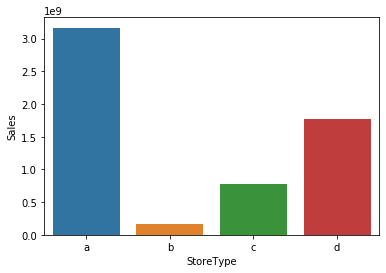

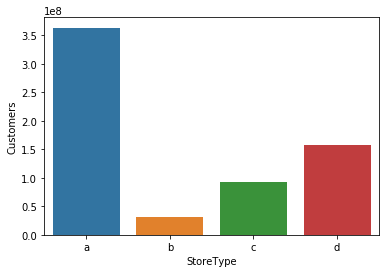

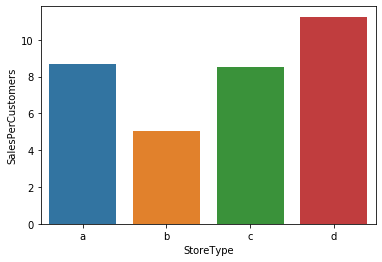

In [23]:
for col in ['Sales', 'Customers', 'SalesPerCustomers']:
# sns.barplot(x='StoreType',y='Sales',data = train_store_sales_overview,ax=axis1)
# sns.barplot(x='StoreType',y='Customers',data = train_store_sales_overview)
    sns.barplot(x='StoreType',y=col, data=train_store_sales_overview)
    plt.show()

##### 工作日分析

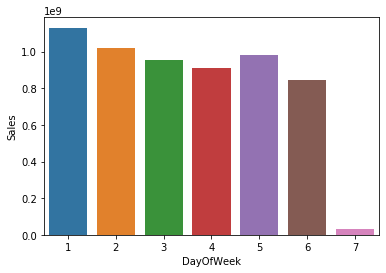

In [24]:
train_store_dayofweek_overview = train_store.groupby('DayOfWeek')['Sales'].sum()
train_store_dayofweek_overview = train_store_dayofweek_overview.reset_index()
sns.barplot(x='DayOfWeek',y='Sales', data=train_store_dayofweek_overview)

#### 是否打折分析

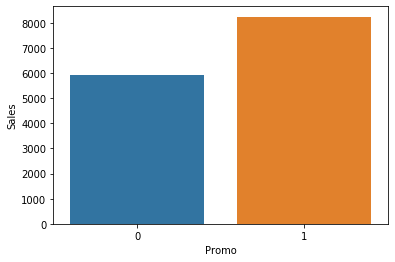

In [25]:
sns.barplot(x='Promo',y='Sales', data=train_store)

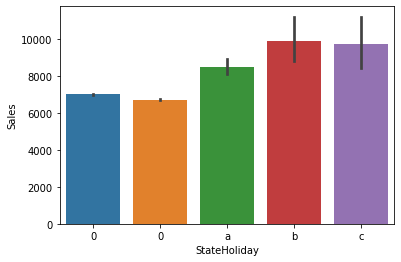

In [26]:
sns.barplot(x='StateHoliday',y='Sales', data=train_store)

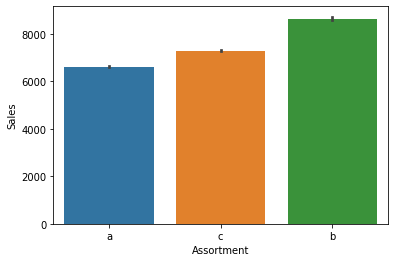

In [27]:
sns.barplot(x='Assortment',y='Sales', data=train_store)

/Users/tangsijia/.pyenv/versions/3.8.1/lib/python3.8/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


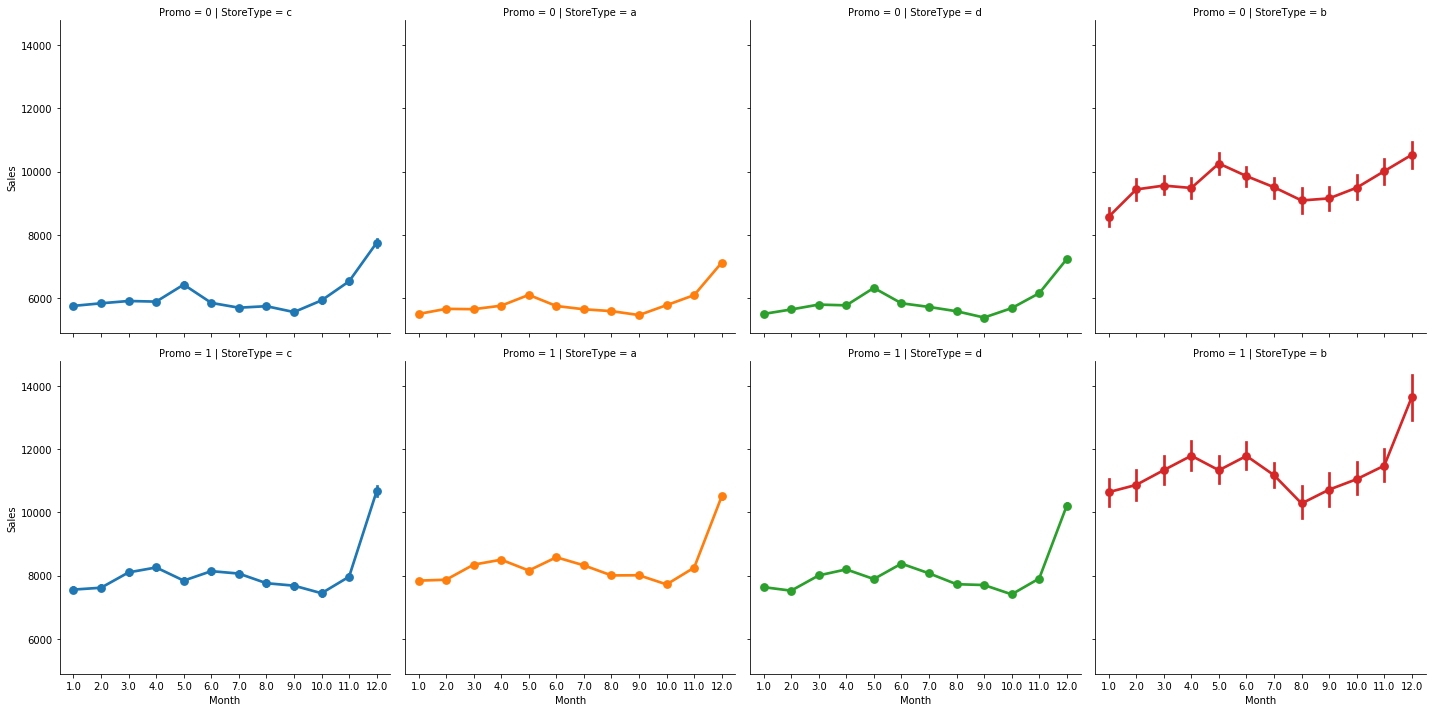

In [31]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
              ) 

In [32]:
train_store['IsCompetitionOpen'] = (train_store.Year >= train_store.CompetitionOpenSinceYear) & (train_store.Month >= train_store.CompetitionOpenSinceYear)
train_store['IsPromo'] = (train_store.Year >= train_store.Promo2SinceYear) & (train_store.Month >= train_store.Promo2SinceWeek)

#### Copetition Distance 与 Sales 之间的关系

KeyboardInterrupt: 

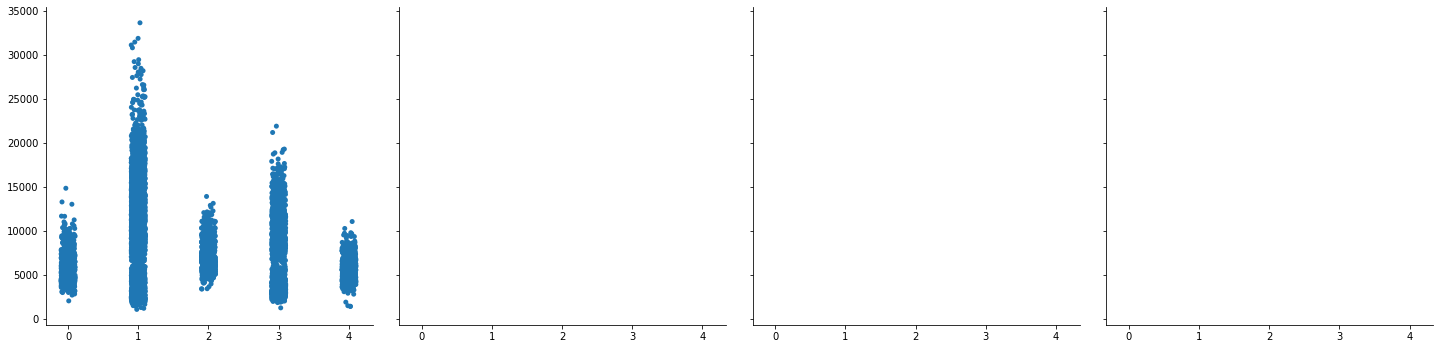

In [30]:
sns.catplot(data = train_store[train_store['IsCompetitionOpen']==True], x = 'CompetitionDistance', y = "Sales", 
               col = 'StoreType', # per store type in cols
               hue = 'StoreType')

## 1. 数据预处理

In [33]:
# 导入数据"
train = pd.read_csv("sales data/train.csv", parse_dates = True)
store = pd.read_csv("sales data/store.csv")
test = pd.read_csv("sales data/test.csv")

/Users/tangsijia/.pyenv/versions/3.8.1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [34]:
train['Date'] = pd.DatetimeIndex(train['Date'])

In [35]:
train['Year'] = [x.year for x in train['Date']]
train['Month'] = [x.month for x in train['Date']]
train['Day'] = [x.day for x in train['Date']]
train['WeekOfYear'] = [x.weekofyear for x in train['Date']]
train['SalesPerCustomer'] = train['Sales'] / train['Customers']

In [36]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.fillna(0, inplace = True)

In [37]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')
test_store = pd.merge(test, store, how = 'inner', on = 'Store')
train_store = train_store.drop('Open', axis=1) # 因为 open 都是 1 所以没有参考价值了

### 可能有关的有：
1. 周几
2. 是否打折
3. 是否放假
4. 学校是否放假
5. 商店类型
6. 顾客数量
7. Assortment
8. 竞争对手相关

In [38]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0


In [39]:
map_dict = {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    '0': 0,
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    'Jan,Apr,Jul,Oct': 1,
    'Feb,May,Aug,Nov': 2,
    'Mar,Jun,Sept,Dec': 3
}

In [40]:
train_store.StateHoliday = train_store.StateHoliday.map(map_dict)
train_store.StoreType = train_store.StoreType.map(map_dict)
train_store.Assortment = train_store.Assortment.map(map_dict)
train_store.PromoInterval = train_store.Assortment.map(map_dict)

In [41]:
df = train_store

In [42]:
features = ['Store', 'PromoOpen', 'DayOfWeek', 'StateHoliday', 'StoreType', 'Month', 'Year', 'SchoolHoliday', 'Assortment', 'Year', 'Promo', 'CompetitionDistance', 'SalesPerCustomer']


In [30]:
features = ['Store', 'PromoOpen', 'DayOfWeek', 'StateHoliday', 'StoreType', 'WeekOfYear', 'Year', 'SchoolHoliday', 'Assortment', 'Year', 'Promo', 'CompetitionDistance', 'SalesPerCustomer']


In [43]:
df.PromoOpen = df.PromoOpen.apply(lambda x: x if x > 0 else 0)
df.CompetitionOpen = df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
# df.CompetitionOpen.unique()

In [44]:
df = df.set_index('Date')

In [45]:
train_df = df[features]

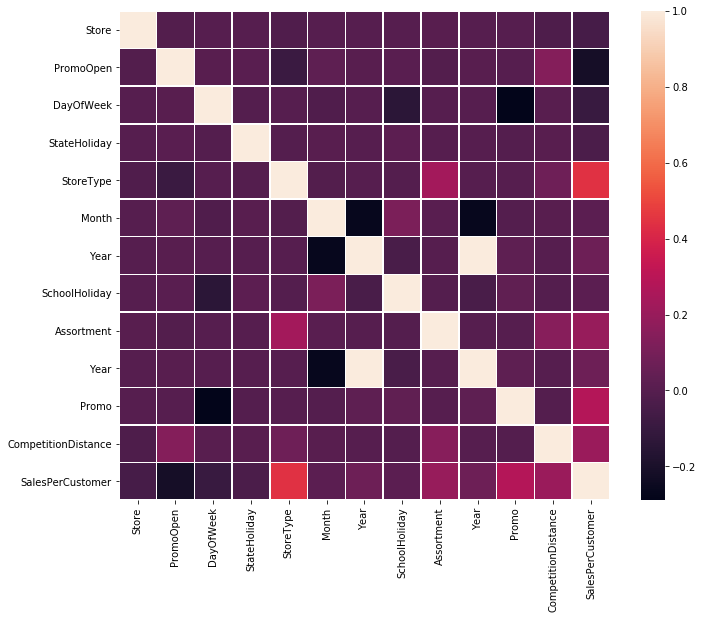

In [46]:
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(train_df.corr(), linewidths = .5, ax=ax)

In [47]:
y_all = df['Sales']
train_all = train_df

In [48]:
train_all = train_all.sort_index()
y_all = y_all.sort_index()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_all, y_all, test_size=0.1, shuffle=False)

In [38]:
# TODO：通过在good data上进行PCA，将其转换成6个维度
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(X_train)
pca.fit(X_train)
pca.explained_variance_ratio_

array([7.14823809e-01, 2.84674665e-01, 5.00367080e-04, 1.10411236e-06,
       2.36040047e-08, 1.42436537e-08, 6.69067001e-09, 4.35362143e-09,
       4.20661607e-09, 9.74323959e-10])

In [216]:
sum(pca.explained_variance_ratio_[:3])

0.9999988616860592

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

In [43]:
clf_a = LinearRegression()
clf_a.fit(X_train,y_train)
y_predict = clf_a.predict(X_test)
print('LinearRegression',rmse(y_predict,y_test))

LinearRegression 0.3850515340414187


In [45]:
clf_d = tree.DecisionTreeRegressor()
clf_d.fit(X_train,y_train)
print('DecisionTreeRegressor',rmse(clf_d.predict(X_test),y_test))

DecisionTreeRegressor 0.2371703031952833


In [ ]:
# clf_g = GradientBoostingClassifier()
# clf_g.fit(X_train,y_train)
# y_predict = clf_g.predict(X_test)
# print('GradientBoostingClassifier',rmspe(y_predict,y_test))

In [3]:
# clf_e = xgb.XGBRegressor()
# clf_e.fit(X_train,y_train)
# print('XGboost',rmspe(clf_e.predict(X_test),y_test))

NameError: name 'X_train' is not defined

In [2]:
import pandas as pd
sample_submission = pd.read_csv("sales data/sample_submission.csv")

In [3]:
sample_submission

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [6]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
  avg_sale_per_store = X_train[["Store", "Sales", "Customers"]].groupby("Store").sum()
  avg_sale_per_store["AvgSalePerStore"] = avg_sale_per_store["Sales"] / avg_sale_per_store["Customers"]

NameError: name 'X_train' is not defined

In [10]:
def get_processed_data_with_store(df, store):
  # 1. merge store
  df = pd.merge(df, store, on="Store", how="left")
  df['Year'] = df['Date'].dt.year
  df['Month'] = df['Date'].dt.month
  df['Day'] = df['Date'].dt.day
  df['DayOfYear'] = df['Date'].dt.dayofyear
  df['WeekOfYear'] = df['Date'].dt.weekofyear
  df.drop("Date", axis=1, inplace=True)
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + \
          (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
  df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) / 4.0
  df['PromoOpen'] = df['PromoOpen'].apply(lambda x: x if x > 0 else 0)
  month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  df['IsPromoMonth'] = 0
  df['MonthStr'] = df.Month.map(month2str)
  for interval in df.PromoInterval.unique():
    if interval != '' and type(interval)==str:
        for month in interval.split(','):
            df.loc[(df.MonthStr == month) & (df.PromoInterval == interval), 'IsPromoMonth'] = 1
  df.drop('MonthStr', axis=1, inplace=True)
  return df

In [12]:
X_train = pd.read_csv("sales data/train.csv", parse_dates=[2], low_memory=False)
store = pd.read_csv("sales data/store.csv")
X_test = pd.read_csv("sales data/test.csv", parse_dates=[3], low_memory=False)

In [13]:
X_test['Open'].unique()
X_test["Open"] = X_test['Open'].fillna(1) # 将缺失的值补充为 1

In [14]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
store.fillna(0, inplace = True)

In [15]:
X_train = get_processed_data_with_store(X_train, store)
X_test = get_processed_data_with_store(X_test, store)

In [20]:
avg_sale_per_store = X_train[["Store", "Sales", "Customers"]].groupby("Store").sum()
avg_sale_per_store["AvgSalePerStore"] = avg_sale_per_store["Sales"] / avg_sale_per_store["Customers"]
avg_sale_per_store.drop(['Sales', 'Customers'], axis=1, inplace=True)
avg_sale_per_store = avg_sale_per_store.reset_index()

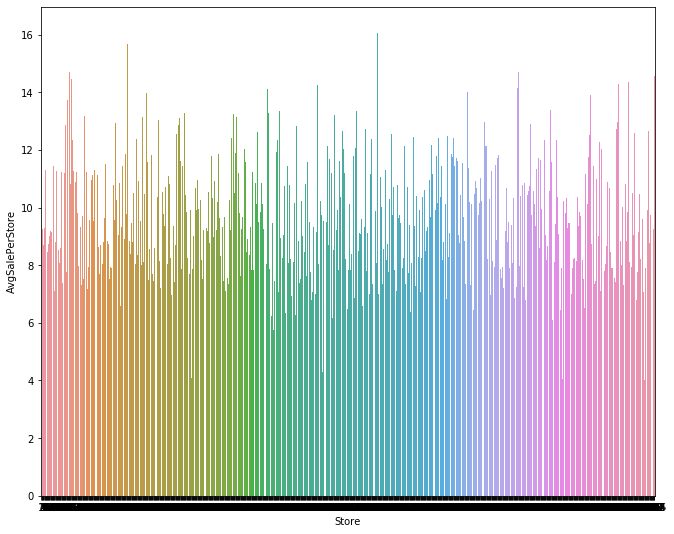

In [24]:
f, ax = plt.subplots(figsize = (11, 9))
sns.barplot(x='Store',y='AvgSalePerStore', data=avg_sale_per_store, ax=ax)

([<matplotlib.axis.XTick at 0x11c1429a0>,
 <a list of 5 Text xticklabel objects>)

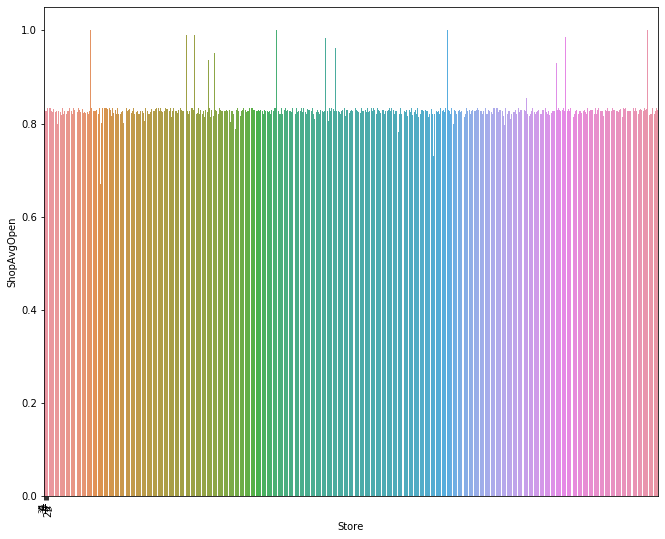

In [27]:
groups = X_train[["Store", "Open"]].groupby("Store").mean()
groups.rename(columns={"Open":"ShopAvgOpen"}, inplace=True)
groups = groups.reset_index()
f, ax = plt.subplots(figsize = (11, 9))
sns.barplot(x='Store',y='ShopAvgOpen', data=groups, ax=ax)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],['0',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'], rotation=90)# 第一个参数是值，第二个参数是对应的显示效果(若无传入则默认直接显示原始数据)，第三个参数是标签旋转角度3. 拉长图片plt.figure(figsize = (长,宽))  # 手动拉长或在创建matplotlib对象前先指定大小4. 缩小文字大小plt.xticks(fontsize = 2)编辑于 2018-08-09​赞同 21​​添加评论​分享​收藏​喜欢​写回答广告相关问题matplotlib图例中文乱码? 48 个回答python Matplotlib 生成 EPS 矢量图无法显示中文？ 6 个回答matplotlib画图的时候怎么清空图片？ 9 个回答Python 中如何把折线图和条形图画在一起？ 7 个回答python matplotlib中axes与axis的区别? 11 个回答相关推荐Python 数据可视化之 matplotlib 实践142 人读过​阅读Python 数据可视化之 matplotlib 精进90 人读过​阅读

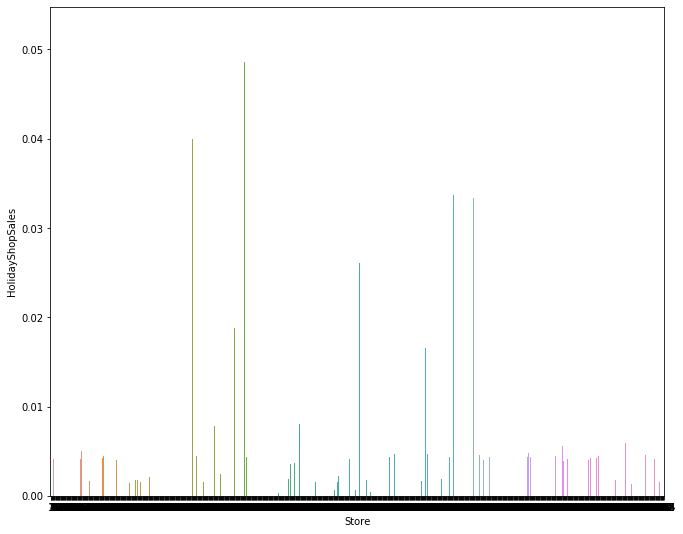

In [28]:
groups1 = X_train[["Store", "Sales"]].groupby("Store").sum()
groups2 = X_train[X_train["StateHoliday"] != "0"][["Store", "Sales"]].groupby("Store").sum()
groups = pd.merge(groups1, groups2, on="Store")
groups["HolidayShopSales"] = groups["Sales_y"] / groups["Sales_x"]
groups.drop(["Sales_x", "Sales_y"], axis=1, inplace=True)
groups = groups.reset_index()
f, ax = plt.subplots(figsize = (11, 9))
sns.barplot(x='Store',y='HolidayShopSales', data=groups, ax=ax)